# Academy Award for Best Director

We first import the packages and load the csv files into dataframes

In [0]:
import pandas as pd
import plotly
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None

In [0]:
bestdir_url = 'https://raw.githubusercontent.com/dcetin/academy-awards/master/best-director.csv'
ceremonies_url = 'https://raw.githubusercontent.com/dcetin/academy-awards/master/ceremonies.csv'
bestdir_df = pd.read_csv(bestdir_url)
ceremonies_df = pd.read_csv(ceremonies_url)

We convert dates into datetime objects, append them as new columns. We also calculate ages using the timedeltas.

In [0]:
def get_ceremony_date(ceremonies_df, i):
  return ceremonies_df.iloc[ceremonies_df[ceremonies_df['Ceremony'] == i].index[0]]['date_dt']
def get_age(ceremonies_df, ceremony, birthdate, fmt='days'):
  if fmt == 'days':
    return (get_ceremony_date(ceremonies_df, ceremony) - birthdate).days
  elif fmt == 'ymd':
    rd = relativedelta(get_ceremony_date(ceremonies_df, ceremony), birthdate)
    return '{}y{}m{}d'.format(rd.years, rd.months, rd.days)
  elif fmt == 'ym':
    rd = relativedelta(get_ceremony_date(ceremonies_df, ceremony), birthdate)
    return '{}y{}m'.format(rd.years, rd.months)
  elif fmt == 'float':
    rd = relativedelta(get_ceremony_date(ceremonies_df, ceremony), birthdate)
    return rd.years + (rd.months)/12.0 + (rd.days)/365.0

In [4]:
ceremonies_df['date_dt'] = pd.to_datetime(ceremonies_df['Date'].values, format='%B %d, %Y')
ceremonies_df['year'] = ceremonies_df.apply(lambda row: row['date_dt'].year, axis=1).copy()
bestdir_df['birthdate_dt'] = pd.to_datetime(bestdir_df['Birthdate'].values, format='%B %d, %Y')
bestdir_df['age_float'] = bestdir_df.apply(lambda row: get_age(ceremonies_df, row['Ceremony'], row['birthdate_dt'], fmt='float'), axis=1)
bestdir_df['age_ym'] = bestdir_df.apply(lambda row: get_age(ceremonies_df, row['Ceremony'], row['birthdate_dt'], fmt='ym'), axis=1)
bestdir_df.tail()

,Ceremony,Won,Film,Name,Birthdate,birthdate_dt,age_float,age_ym
448,91,False,BlacKkKlansman,Spike Lee,"March 20, 1957",1957-03-20,61.927626,61y11m
449,91,False,Cold War,Pawel Pawlikowski,"September 15, 1957",1957-09-15,61.441324,61y5m
450,91,False,The Favourite,Yorgos Lanthimos,"September 23, 1973",1973-09-23,45.419406,45y5m
451,91,True,Roma,Alfonso Cuaron,"November 28, 1961",1961-11-28,57.240639,57y2m
452,91,False,Vice,Adam McKay,"April 17, 1968",1968-04-17,50.852511,50y10m


We calculate some statistics and extract some filters which will come in handy when plotting the data.

In [0]:
female_dirs = ['Lina Wertmuller', 'Jane Campion', 'Sofia Coppola', 'Kathryn Bigelow', 'Greta Gerwig']
nominees = bestdir_df['Won'] == False
winners = bestdir_df['Won'] == True
females = bestdir_df['Name'].isin(female_dirs)
ages_per_ceremony = [bestdir_df['age_float'][bestdir_df['Ceremony']==i].values for i in range(1, len(ceremonies_df)+1)]
means = np.asarray([np.mean(x) for x in ages_per_ceremony])
medians = np.asarray([np.median(x) for x in ages_per_ceremony])
stds = np.asarray([np.std(x) for x in ages_per_ceremony])
bestdir_df['color_nw'] = bestdir_df.apply(lambda row: 'red' if row['Won'] else 'black', axis=1).copy()
bestdir_df['color_mf'] = bestdir_df.apply(lambda row: 'red' if row['Name'] in female_dirs else 'blue', axis=1).copy()
xticks_pos, xticks_lab = list(range(1, len(ceremonies_df)+1, 3)), ["'" + str(x)[-2:] for x in ceremonies_df['year'][::3].values]
hovertext = bestdir_df.apply(lambda row: '{}, {} ({}, {})'.format(row['Name'], row['age_ym'], row['Film'], 
                                                  get_ceremony_date(ceremonies_df, row['Ceremony']).year), axis=1).copy()

We plot the winners and nominees by their age at the day of the award ceremony. 

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bestdir_df['Ceremony'][nominees], y=bestdir_df['age_float'][nominees], 
                           mode='markers', marker_color=bestdir_df['color_nw'][nominees], 
                           hoverinfo="text", hovertext=hovertext[nominees], name="Nominees"))
fig.add_trace(go.Scatter(x=bestdir_df['Ceremony'][winners], y=bestdir_df['age_float'][winners], 
                         mode='markers', marker_color=bestdir_df['color_nw'][winners], 
                         hoverinfo="text", hovertext=hovertext[winners], name="Winners"))
fig.add_trace(go.Scatter(x=ceremonies_df['Ceremony'], y=medians, marker_color='green', name="Medians", hoverinfo='y', visible='legendonly'))
fig.add_trace(go.Scatter(x=ceremonies_df['Ceremony'], y=means, marker_color='blue', name="Means", hoverinfo='y', visible='legendonly'))
fig.update_layout(title='Nominees and winners through years by age')
fig.update_yaxes(zeroline=False, title='Age')
fig.update_xaxes(zeroline=False, title='Year', tickvals=xticks_pos, ticktext=xticks_lab)
fig.show()

In [11]:
plotly.offline.plot(fig, filename='file.html')
plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')

'<div>\n        \n        \n            <div id="849ace11-4ea6-497b-a14a-bcac3b6f7000" class="plotly-graph-div" style="height:100%; width:100%;"></div>\n            <script type="text/javascript">\n                \n                    window.PLOTLYENV=window.PLOTLYENV || {};\n                    \n                if (document.getElementById("849ace11-4ea6-497b-a14a-bcac3b6f7000")) {\n                    Plotly.newPlot(\n                        \'849ace11-4ea6-497b-a14a-bcac3b6f7000\',\n                        [{"hoverinfo": "text", "hovertext": ["Ted Wilde, 39y5m (Speedy, 1929)", "Herbert Brenon, 49y4m (Sorrell and Son, 1929)", "King Vidor, 35y3m (The Crowd, 1929)", "Lionel Barrymore, 51y11m (Madame X, 1930)", "Harry Beaumont, 42y1m (The Broadway Melody, 1930)", "Irving Cummings, 41y5m (In Old Arizona, 1930)", "Frank Lloyd, 44y2m (Drag; Weary River, 1930)", "Ernst Lubitsch, 38y2m (The Patriot, 1930)", "Clarence Brown, 40y5m (Anna Christie; Romance, 1930)", "Robert Leonard, 41y0m (The 

We plot them alongside the mean and variance per each ceremony to discern some outliers in terms of age. We can also search a director by name and see how well he/she was received in Academy Awards throughout years.

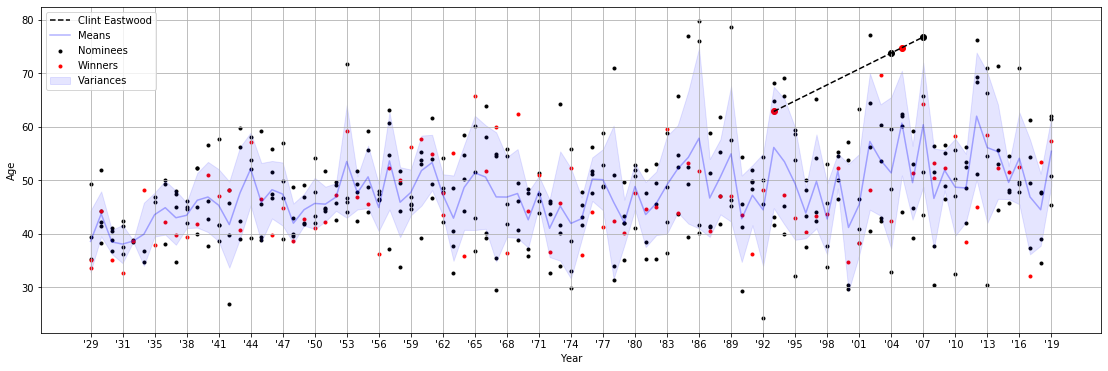

In [7]:
name = 'Clint Eastwood'
specifier = bestdir_df['Name'] == name
plt.figure(figsize=(19,6))
plt.scatter(bestdir_df['Ceremony'][nominees], bestdir_df['age_float'][nominees], marker='.', c='k', label='Nominees')
plt.scatter(bestdir_df['Ceremony'][winners], bestdir_df['age_float'][winners], marker='.', c='r', label='Winners')
plt.plot(bestdir_df['Ceremony'][specifier], bestdir_df['age_float'][specifier], linestyle='--', c='k', label=name)
plt.scatter(bestdir_df['Ceremony'][nominees & specifier], bestdir_df['age_float'][nominees & specifier], c='k', label='_nolegend_')
plt.scatter(bestdir_df['Ceremony'][winners & specifier], bestdir_df['age_float'][winners & specifier], c='r', label='_nolegend_')
plt.plot(ceremonies_df['Ceremony'], means, linestyle='-', c='b', alpha=0.3, label='Means')
# plt.plot(ceremonies_df['Ceremony'], medians, linestyle='-', c='g', alpha=0.7, label='Medians')
plt.fill_between(ceremonies_df['Ceremony'], means-stds, means+stds, color='b', alpha=0.1, label='Variances')
plt.xticks(xticks_pos, xticks_lab)
plt.grid(True)
plt.ylabel('Age')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()